In [1]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
import sklearn as sk

In [2]:
# Loading data and previewing the content
errors_data = pd.read_csv("root_cause_analysis.csv")
errors_data

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY
...,...,...,...,...,...,...,...,...,...
995,996,0,0,0,0,0,0,1,DATABASE_ISSUE
996,997,0,0,0,1,0,0,0,NETWORK_DELAY
997,998,1,1,1,0,0,0,0,MEMORY_LEAK
998,999,0,1,1,1,1,0,0,NETWORK_DELAY


In [4]:
# Using a label encoder to convert String to numeric values for the target variable
from sklearn import preprocessing
label_encoder = sk.preprocessing.LabelEncoder()
errors_data['ROOT_CAUSE'] = label_encoder.fit_transform(errors_data['ROOT_CAUSE'])
errors_data['ROOT_CAUSE'].unique()

array([1, 2, 0])

In [5]:
# Converting the input to a numpy array
np_errors = errors_data.to_numpy()
np_errors

array([[   1,    0,    0, ...,    0,    1,    1],
       [   2,    0,    0, ...,    0,    1,    1],
       [   3,    0,    1, ...,    1,    1,    1],
       ...,
       [ 998,    1,    1, ...,    0,    0,    1],
       [ 999,    0,    1, ...,    0,    0,    2],
       [1000,    1,    0, ...,    1,    0,    0]])

In [6]:
# Separating feature and target variables
X_data = np_errors[:,1:8]
X_data

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 1, 0]])

In [7]:
Y_data = np_errors[:,8]
Y_data

array([1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1,
       0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0,
       1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0,
       0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0,
       2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0,
       0, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1,

In [8]:
# # The data is in 0/1 simple digit form. So no need to transform and scale. In case of need, uncomment the following code.
# 
# Creating a scaler model that is fit on the input data.
# scaler = sk.preprocessing.StandardScaler().fit(X_data)
# 
# # Scaling the numeric feature variables
# X_data = scaler.transform(X_data)
# X_data

In [9]:
# Converting the target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data, 3)
Y_data

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [12]:
# Splitting the training and test data
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split( X_data, Y_data, test_size=0.10)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(900, 7) (900, 3) (100, 7) (100, 3)


In [13]:
# Specifying the number of classes in the target variable
NB_CLASSES = 3

# Creating a sequential model in Keras
model = tf.keras.models.Sequential()

# Adding the first hidden layer
model.add(tf.keras.layers.Dense(128,                    # Number of nodes
                                input_shape = (7, ),      # Number of input variables
                                name = 'Hidden-Layer-1',  # Logical name
                                activation = 'relu'))     # Activation function

# Adding the second hidden layer
model.add(tf.keras.layers.Dense(128,                    # Number of nodes
                                name = 'Hidden-Layer-2',  # Logical name
                                activation = 'relu'))     # Activation function

# # Adding the third hidden layer
# model.add(tf.keras.layers.Dense(32,                    # Number of nodes
#                                 name = 'Hidden-Layer-3',  # Logical name
#                                 activation = 'relu'))     # Activation function

# Adding an output layer with the Softmax activation function
model.add(tf.keras.layers.Dense(NB_CLASSES,
                                name = 'Output-Layer',
                                activation = 'softmax'))

# Compiling the model with loss and metrics
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Reviewing the model's meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               1024      
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,923
Trainable params: 17,923
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Making it verbose so we can see the progress
VERBOSE = 1

#**************** Setting up the Hyper-Parameters for training ****************#

# Setting the Batch size
BATCH_SIZE = 32

# Setting the number of Epochs
EPOCHS = 20

# Setting the validation split: 20% of the "Training" data will be used for validation after each Epoch
VALIDATION_SPLIT = 0.2

# Fitting the model:
# This will perform the entire training cycle, including forward propagation, loss computation, backward propagation and gradient descent.
# Executing for the specified Batch sizes and Epoch, and performing validation after each Epoch. 
history = model.fit(X_train,
                    Y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT)

Epoch 1/20


2023-09-04 19:11:36.348664: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


23/23 [==============================] - 0s 6ms/step - loss: 0.7881 - accuracy: 0.7431 - val_loss: 0.6101 - val_accuracy: 0.8111
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.8167 - val_loss: 0.5025 - val_accuracy: 0.8056
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8194 - val_loss: 0.4851 - val_accuracy: 0.8056
Epoch 4/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.8278 - val_loss: 0.4615 - val_accuracy: 0.8111
Epoch 5/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8306 - val_loss: 0.4663 - val_accuracy: 0.8500
Epoch 6/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8500 - val_loss: 0.4504 - val_accuracy: 0.8333
Epoch 7/20
23/23 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8472 - val_loss: 0.4569 - val_accuracy: 0.8389
Epoch 8/20
23/23 [=============

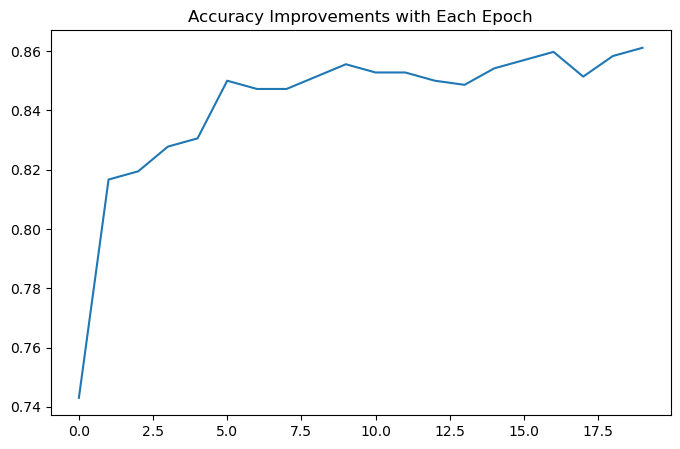

In [15]:
# Plotting the accuracy of the model after each Epoch.
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize = (8, 5))
plt.title("Accuracy Improvements with Each Epoch")
plt.show()

In [16]:
# Evaluating the model against the Test dataset.
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.5994 - accuracy: 0.8000


[0.5994167327880859, 0.800000011920929]

In [17]:
# Passing individual flags as an example case to predict the root cause
prediction = np.argmax(model.predict([[1, 0, 0, 0, 1, 1, 0]]), axis=1 )
print(label_encoder.inverse_transform(prediction))

1/1 [==============================] - 0s 44ms/step
['DATABASE_ISSUE']


In [18]:
# Predicting as a Batch
print(label_encoder.inverse_transform(np.argmax(model.predict([[1,0,0,0,1,1,0],
                                                               [0,1,1,1,0,0,0],
                                                               [1,1,0,1,1,0,1],
                                                               [0,0,0,0,0,1,0],
                                                               [1,0,1,0,1,1,1]]), axis=1 )))

1/1 [==============================] - 0s 19ms/step
['DATABASE_ISSUE' 'NETWORK_DELAY' 'MEMORY_LEAK' 'DATABASE_ISSUE'
 'DATABASE_ISSUE']
